In [14]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [4]:
spotify_lyrics = pd.read_csv('./lyricspotify.csv')
missed = pd.read_csv('./lastfmmissed.csv')
lastfm = pd.read_csv('./lastfm.csv')
missed = missed[missed.columns[-8:]]
missed.head()
lastfm = lastfm[lastfm.columns[1:]]
last_fm_total = pd.concat([lastfm,missed])
last_fm_total = last_fm_total.rename(columns={'track-title':'song'})
last_fm_total['artist'] = last_fm_total['artist'].apply(lambda x: x.lower())
last_fm_total['artist'] = last_fm_total['artist'].apply(lambda x: x.replace(' ', '-'))
spotify_lyrics.drop_duplicates(subset=['song'], keep='first', inplace=True)
final = spotify_lyrics.merge(last_fm_total, on=['song', 'artist'])
final

,Unnamed: 0,artist,song,lyrics,features,danceability,energy,loudness,speechiness,liveness,tempo,valence,isrc,release_date,album,duration,listeners,playcount,single_release,track_no
0,19,drake,Survival,I been waitin' on this Yeah All of this disord...,NaN,0.607,0.596,-9.090,0.3580,0.1230,77.324,0.1490,USCM51800189,2018-06-29,Scorpion,136,69548,229946,NaN,1
1,20,drake,Nonstop,"Tay Keith, fuck these niggas up! Look, I just ...",NaN,0.912,0.412,-8.074,0.1240,0.1040,154.983,0.4220,USCM51800191,2018-06-29,Scorpion,238,108576,750236,NaN,2
2,21,drake,Elevate,"Ayy, elevate, elevate Only obligation is to te...",NaN,0.758,0.474,-8.720,0.1460,0.1160,76.062,0.0541,USCM51800196,2018-06-29,Scorpion,185,63287,255611,NaN,3
3,22,drake,Emotionless,"You've got me feeling emotions Ayy, higher Ahh...",NaN,0.413,0.677,-5.120,0.2550,0.0793,172.501,0.0845,USCM51800199,2018-06-29,Scorpion,302,65061,273895,NaN,4
4,23,drake,God's Plan,"Yeah, they wishin' and wishin' and wishin' and...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Scorpion,199,235559,2144208,"16 Feb 2018, 20:15",5
5,24,drake,I'm Upset,Yeah I'm workin' on dyin' I'm upset Fifty thou...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Scorpion,214,82283,432575,NaN,6
6,25,drake,8 Out of 10,Too rich for who? Y'all just got rich again Wh...,NaN,0.529,0.690,-7.870,0.7400,0.4980,170.540,0.3110,USCM51800202,2018-06-29,Scorpion,195,59637,210660,NaN,7
7,26,drake,Mob Ties,"Ayy, sick of these niggas (sick) Sick of these...",NaN,0.755,0.575,-8.393,0.0678,0.2760,85.987,0.4900,USCM51800211,2018-06-29,Scorpion,205,64982,361506,NaN,8
8,27,drake,Can't Take a Joke,Ayo blast that shit Maxx Blast that shit back ...,NaN,0.761,0.598,-7.249,0.1820,0.0839,173.897,0.4470,USCM51800215,2018-06-29,Scorpion,163,6189,32161,NaN,9
9,28,drake,Sandra's Rose,"Yeah, no more, no more Baby, baby, baby, baby,...",NaN,0.487,0.849,-5.432,0.2460,0.1430,152.093,0.5200,USCM51800218,2018-06-29,Scorpion,216,5714,24236,NaN,10


In [6]:
cols=final.columns.tolist()
cols
newcols=['Unnamed: 0',
 'artist',
 'song',
 'lyrics',
 'features',
 'danceability',
 'energy',
 'loudness',
 'speechiness',
 'liveness',
 'tempo',
 'valence',
 'duration',
 'listeners',
 'playcount','track_no','isrc','release_date',
 'album',
 'single_release']
final2=final.reindex((newcols),axis=1)
final2
NUMS = final2.iloc[:,5:16]
final2.isna().sum()

Unnamed: 0           0
artist               0
song                 0
lyrics               2
features          1062
danceability        37
energy              37
loudness            37
speechiness         37
liveness            37
tempo               37
valence             37
duration             0
listeners            0
playcount            0
track_no             0
isrc                37
release_date        37
album                0
single_release     829
dtype: int64

In [7]:
NUMS.corr()

,danceability,energy,loudness,speechiness,liveness,tempo,valence,duration,listeners,playcount,track_no
danceability,1.000000,0.059600,0.234345,0.247493,-0.062062,0.057357,0.152206,-0.121195,-0.213399,-0.194479,-0.031574
energy,0.059600,1.000000,0.716750,-0.036471,0.144005,0.095438,0.420221,0.008680,0.049273,0.033225,-0.052645
loudness,0.234345,0.716750,1.000000,-0.089022,0.035235,0.077490,0.252323,-0.067534,-0.065865,-0.038233,-0.081347
speechiness,0.247493,-0.036471,-0.089022,1.000000,0.154819,0.130978,-0.051801,0.001147,-0.240050,-0.229211,0.075303
liveness,-0.062062,0.144005,0.035235,0.154819,1.000000,0.050203,0.022697,0.016319,-0.017549,-0.033581,0.022489
tempo,0.057357,0.095438,0.077490,0.130978,0.050203,1.000000,0.014494,-0.051180,-0.073289,-0.064453,0.036726
valence,0.152206,0.420221,0.252323,-0.051801,0.022697,0.014494,1.000000,-0.111396,0.142972,0.100298,-0.018441
duration,-0.121195,0.008680,-0.067534,0.001147,0.016319,-0.051180,-0.111396,1.000000,0.164807,0.160917,0.111620
listeners,-0.213399,0.049273,-0.065865,-0.240050,-0.017549,-0.073289,0.142972,0.164807,1.000000,0.958118,-0.028380
playcount,-0.194479,0.033225,-0.038233,-0.229211,-0.033581,-0.064453,0.100298,0.160917,0.958118,1.000000,-0.064761


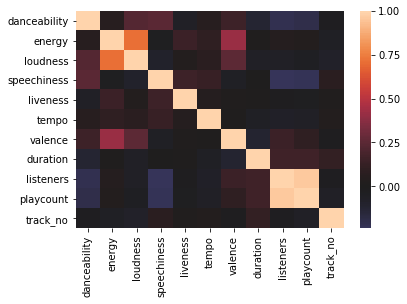

In [8]:
import seaborn as sns
sns.heatmap(NUMS.corr(),center=0);
#drop loudness or energy
#drop listeners or playcount

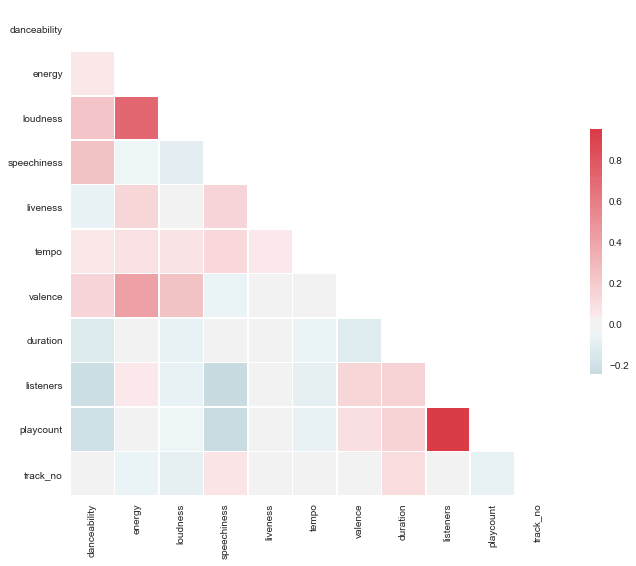

In [15]:
#Creating a heatmap to show features that are highly correlated

sns.set(style = 'white')

corr = NUMS.corr()

mask = np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize = (11,9))

cmap = sns.diverging_palette(220,10,as_cmap=True)

sns.heatmap(corr,mask=mask,cmap=cmap,vmax=0.95,center=0,square=True,linewidths=0.5,cbar_kws={'shrink' : 0.5})

In [64]:
final2 = final2.drop('loudness',axis=1)
final2 = final2.drop('Unnamed: 0',axis=1)

In [57]:
#EDA
final2.nlargest(30, 'listeners')

,artist,song,lyrics,features,danceability,energy,speechiness,liveness,tempo,valence,duration,listeners,playcount,track_no,isrc,release_date,album,single_release
804,red-hot-chili-peppers,Californication,Psychic spies from China try to steal your min...,NaN,0.592,0.767,0.0270,0.1270,96.483,0.328,321,1593185,12073976,3,USWB19900690,1999-06-08,Greatest Hits,"03 Jul 2008, 11:06"
802,red-hot-chili-peppers,Under the Bridge,Sometimes I feel like I don't have a partner S...,NaN,0.559,0.345,0.0459,0.1410,84.581,0.458,264,1521264,10634409,1,USWB19901576,1991-09-24,Greatest Hits,"13 Apr 2009, 07:03"
805,red-hot-chili-peppers,Scar Tissue,Scar tissue that I wish you saw Sarcastic mist...,NaN,0.595,0.717,0.0295,0.1080,88.969,0.547,217,1365402,10212061,4,USWB19900674,1999-06-08,Greatest Hits,"12 Jul 2009, 06:29"
806,red-hot-chili-peppers,Otherside,"How long, how long will I slide? Separate my s...",NaN,0.458,0.795,0.0574,0.0756,123.229,0.513,255,1355340,10480199,6,USWB19900693,1999-06-08,Greatest Hits,"24 Jan 2010, 23:18"
738,led-zeppelin,Stairway to Heaven,There's a lady who's sure all that glitters is...,NaN,0.338,0.340,0.0339,0.1160,82.433,0.197,480,1287623,10872978,13,USAT21300959,1971-11-08,Mothership,"23 May 2008, 13:39"
884,adele,Rolling in the Deep,There's a fire starting in my heart Reaching a...,NaN,0.729,0.756,0.0294,0.0527,104.945,0.522,228,1240135,13118418,1,GBBKS1000335,2011-01-19,21,"01 Dec 2010, 18:04"
493,michael-jackson,Billie Jean,She was more like a beauty queen from a movie ...,NaN,0.920,0.654,0.0401,0.0359,117.046,0.847,297,1195733,7151475,6,USSM19902991,1982-11-30,Thriller,"19 Jul 2008, 15:21"
522,metallica,Enter Sandman,"Say your prayers, little one Don't forget, my ...",NaN,0.579,0.824,0.0300,0.0590,123.331,0.635,595,1101805,9430526,1,USEE10001992,1991-08-12,Metallica,"15 Aug 2008, 10:30"
528,metallica,Nothing Else Matters,So close no matter how far Couldn't be much mo...,NaN,0.558,0.364,0.0265,0.0753,142.171,0.170,377,1089138,10136367,8,USEE10001999,1991-08-12,Metallica,"11 Dec 2008, 11:38"
460,queen,Another One Bites the Dust,"Ooh, let's go! Steve walks warily down the str...",NaN,0.951,0.530,0.1780,0.1700,109.979,0.699,213,1047317,5820121,2,GBUM71029605,1980-06-27,Greatest Hits,"24 Oct 2008, 14:35"


In [65]:
final2

,artist,song,lyrics,features,danceability,energy,speechiness,liveness,tempo,valence,duration,listeners,playcount,track_no,isrc,release_date,album,single_release
0,drake,Survival,I been waitin' on this Yeah All of this disord...,NaN,0.607,0.596,0.3580,0.1230,77.324,0.1490,136,69548,229946,1,USCM51800189,2018-06-29,Scorpion,NaN
1,drake,Nonstop,"Tay Keith, fuck these niggas up! Look, I just ...",NaN,0.912,0.412,0.1240,0.1040,154.983,0.4220,238,108576,750236,2,USCM51800191,2018-06-29,Scorpion,NaN
2,drake,Elevate,"Ayy, elevate, elevate Only obligation is to te...",NaN,0.758,0.474,0.1460,0.1160,76.062,0.0541,185,63287,255611,3,USCM51800196,2018-06-29,Scorpion,NaN
3,drake,Emotionless,"You've got me feeling emotions Ayy, higher Ahh...",NaN,0.413,0.677,0.2550,0.0793,172.501,0.0845,302,65061,273895,4,USCM51800199,2018-06-29,Scorpion,NaN
4,drake,God's Plan,"Yeah, they wishin' and wishin' and wishin' and...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,199,235559,2144208,5,NaN,NaN,Scorpion,"16 Feb 2018, 20:15"
5,drake,I'm Upset,Yeah I'm workin' on dyin' I'm upset Fifty thou...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,214,82283,432575,6,NaN,NaN,Scorpion,NaN
6,drake,8 Out of 10,Too rich for who? Y'all just got rich again Wh...,NaN,0.529,0.690,0.7400,0.4980,170.540,0.3110,195,59637,210660,7,USCM51800202,2018-06-29,Scorpion,NaN
7,drake,Mob Ties,"Ayy, sick of these niggas (sick) Sick of these...",NaN,0.755,0.575,0.0678,0.2760,85.987,0.4900,205,64982,361506,8,USCM51800211,2018-06-29,Scorpion,NaN
8,drake,Can't Take a Joke,Ayo blast that shit Maxx Blast that shit back ...,NaN,0.761,0.598,0.1820,0.0839,173.897,0.4470,163,6189,32161,9,USCM51800215,2018-06-29,Scorpion,NaN
9,drake,Sandra's Rose,"Yeah, no more, no more Baby, baby, baby, baby,...",NaN,0.487,0.849,0.2460,0.1430,152.093,0.5200,216,5714,24236,10,USCM51800218,2018-06-29,Scorpion,NaN


In [74]:
z=final2.iloc[0,15]
z
import datetime
from datetime import date
import re

In [80]:
match = re.search(r'\d{4}-\d{2}-\d{2}', z)
date = datetime.datetime.strptime(match.group(), '%Y-%m-%d').date()
z

'2018-06-29'

In [88]:
#GET RID OF NULL DATES
final2 = final2[final2.release_date.notnull()]

2018-06-29
2018-06-29
2018-06-29
2018-06-29
2018-06-29
2018-06-29
2018-06-29
2018-06-29
2018-06-29
2018-06-29
2018-06-29
2018-06-29
2018-06-29
2018-06-29
2018-06-29
2018-06-29
2018-06-29
2018-06-29
2018-06-29
2018-06-29
2018-06-29
2016-12-09
2016-12-09
2016-12-09
2016-12-09
2016-12-09
2016-12-09
2016-12-09
2016-12-09
2016-12-09
2016-12-09
2016-12-09
2016-12-09
2016-12-09
2016-12-09
2018-08-31
2018-08-31
2018-08-31
2018-08-31
2018-08-31
2018-08-31
2018-08-31
2018-08-31
2018-08-31
2018-08-31
2018-06-15
2018-06-15
2018-06-15
2018-06-15
2018-06-15
2018-05-30
2018-06-15
2018-06-15
2018-06-15
2017-11-03
2017-11-03
2017-11-03
2017-11-03
2017-11-03
2017-11-03
2017-11-03
2017-11-03
2017-11-03
2017-11-03
2018-01-12
2018-01-12
2018-01-12
2018-01-12
2018-01-12
2018-01-12
2018-08-16
2018-01-12
2018-01-12
2018-01-12
2017-12-15
2018-01-08
2017-12-15
2017-12-15
2017-12-15
2017-12-15
2017-12-15
2017-12-15
2017-12-15
2017-12-15
2017-12-15
2017-12-15
2017-12-15
2017-12-15
2017-12-15
2017-12-15
2017-03-18

In [122]:
age
import numpy as np
final2['age']=np.nan
for idx, row in final2.iterrows():
    date=None
    today=None
    print(datetime.datetime.strptime(final2.loc[idx,'today'],"%Y-%m-%d"))
    date = datetime.datetime.strptime(final2.loc[idx,'release_date'],"%Y-%m-%d")
    today = datetime.datetime.strptime(final2.loc[idx,'today'],"%Y-%m-%d")
    final2.loc[idx,'age']=abs((today-date).days)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


2019-01-09 00:00:00
2019-01-09 00:00:00
2019-01-09 00:00:00
2019-01-09 00:00:00
2019-01-09 00:00:00
2019-01-09 00:00:00
2019-01-09 00:00:00
2019-01-09 00:00:00
2019-01-09 00:00:00
2019-01-09 00:00:00
2019-01-09 00:00:00
2019-01-09 00:00:00
2019-01-09 00:00:00
2019-01-09 00:00:00
2019-01-09 00:00:00
2019-01-09 00:00:00
2019-01-09 00:00:00
2019-01-09 00:00:00
2019-01-09 00:00:00
2019-01-09 00:00:00
2019-01-09 00:00:00
2019-01-09 00:00:00
2019-01-09 00:00:00
2019-01-09 00:00:00
2019-01-09 00:00:00
2019-01-09 00:00:00
2019-01-09 00:00:00
2019-01-09 00:00:00
2019-01-09 00:00:00
2019-01-09 00:00:00
2019-01-09 00:00:00
2019-01-09 00:00:00
2019-01-09 00:00:00
2019-01-09 00:00:00
2019-01-09 00:00:00
2019-01-09 00:00:00
2019-01-09 00:00:00
2019-01-09 00:00:00
2019-01-09 00:00:00
2019-01-09 00:00:00
2019-01-09 00:00:00
2019-01-09 00:00:00
2019-01-09 00:00:00
2019-01-09 00:00:00
2019-01-09 00:00:00
2019-01-09 00:00:00
2019-01-09 00:00:00
2019-01-09 00:00:00
2019-01-09 00:00:00
2019-01-09 00:00:00


ValueError: time data '2011' does not match format '%Y-%m-%d'

In [126]:
final2

,artist,song,lyrics,features,danceability,energy,speechiness,liveness,tempo,valence,duration,listeners,playcount,track_no,isrc,release_date,album,single_release,today,age
0,drake,Survival,I been waitin' on this Yeah All of this disord...,NaN,0.607,0.596,0.3580,0.1230,77.324,0.1490,136,69548,229946,1,USCM51800189,2018-06-29,Scorpion,NaN,2019-01-09,194.0
1,drake,Nonstop,"Tay Keith, fuck these niggas up! Look, I just ...",NaN,0.912,0.412,0.1240,0.1040,154.983,0.4220,238,108576,750236,2,USCM51800191,2018-06-29,Scorpion,NaN,2019-01-09,194.0
2,drake,Elevate,"Ayy, elevate, elevate Only obligation is to te...",NaN,0.758,0.474,0.1460,0.1160,76.062,0.0541,185,63287,255611,3,USCM51800196,2018-06-29,Scorpion,NaN,2019-01-09,194.0
3,drake,Emotionless,"You've got me feeling emotions Ayy, higher Ahh...",NaN,0.413,0.677,0.2550,0.0793,172.501,0.0845,302,65061,273895,4,USCM51800199,2018-06-29,Scorpion,NaN,2019-01-09,194.0
6,drake,8 Out of 10,Too rich for who? Y'all just got rich again Wh...,NaN,0.529,0.690,0.7400,0.4980,170.540,0.3110,195,59637,210660,7,USCM51800202,2018-06-29,Scorpion,NaN,2019-01-09,194.0
7,drake,Mob Ties,"Ayy, sick of these niggas (sick) Sick of these...",NaN,0.755,0.575,0.0678,0.2760,85.987,0.4900,205,64982,361506,8,USCM51800211,2018-06-29,Scorpion,NaN,2019-01-09,194.0
8,drake,Can't Take a Joke,Ayo blast that shit Maxx Blast that shit back ...,NaN,0.761,0.598,0.1820,0.0839,173.897,0.4470,163,6189,32161,9,USCM51800215,2018-06-29,Scorpion,NaN,2019-01-09,194.0
9,drake,Sandra's Rose,"Yeah, no more, no more Baby, baby, baby, baby,...",NaN,0.487,0.849,0.2460,0.1430,152.093,0.5200,216,5714,24236,10,USCM51800218,2018-06-29,Scorpion,NaN,2019-01-09,194.0
10,drake,Talk Up,"Ayy, ayy Lot of 6's in here tonight Yeah, yeah...",NaN,0.758,0.490,0.1390,0.2920,140.116,0.3350,223,37762,101435,11,USCM51800232,2018-06-29,Scorpion,NaN,2019-01-09,194.0
11,drake,Is There More,Only holdin' up I do is my end of the bargain ...,NaN,0.698,0.547,0.3150,0.1590,83.801,0.5480,226,42580,133011,12,USCM51800209,2018-06-29,Scorpion,NaN,2019-01-09,194.0


In [127]:
final2.describe()

,features,danceability,energy,speechiness,liveness,tempo,valence,duration,listeners,playcount,track_no,age
count,0.0,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1.025000e+03,1.025000e+03,1025.000000,249.000000
mean,NaN,0.646285,0.617854,0.144911,0.180592,121.620255,0.446982,227.061463,1.207920e+05,8.105684e+05,8.242927,495.927711
std,NaN,0.151348,0.189303,0.137675,0.131847,29.986244,0.216346,77.142314,2.247232e+05,1.634314e+06,4.950192,284.145583
min,NaN,0.150000,0.051300,0.023600,0.026000,48.718000,0.037100,0.000000,1.400000e+01,2.800000e+01,1.000000,131.000000
25%,NaN,0.543000,0.479000,0.041900,0.102000,95.776000,0.277000,188.000000,5.884000e+03,2.456400e+04,4.000000,341.000000
50%,NaN,0.654000,0.631000,0.078200,0.128000,123.020000,0.423000,219.000000,2.375000e+04,1.147240e+05,8.000000,460.000000
75%,NaN,0.758000,0.763000,0.221000,0.215000,142.965000,0.600000,253.000000,1.110260e+05,7.964860e+05,12.000000,662.000000
max,NaN,0.962000,0.998000,0.866000,0.874000,199.834000,0.970000,864.000000,1.593185e+06,1.311842e+07,27.000000,1346.000000


In [129]:
import matplotlib.pyplot as plt

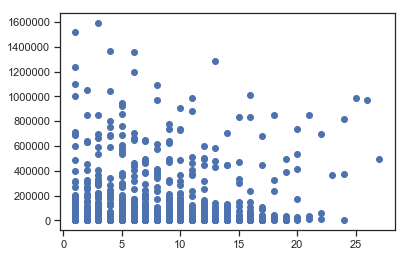

In [139]:
plt.scatter(final2.track_no,final2.listeners)

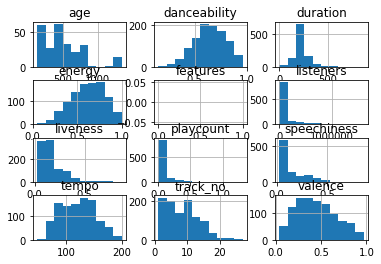

In [131]:
final2.hist()
plt.show()

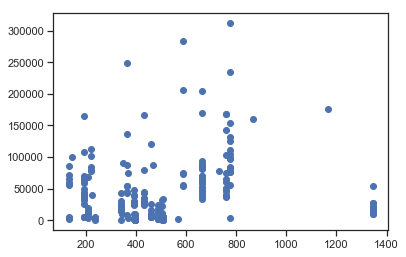

In [138]:
plt.scatter(final2.age,final2.listeners)

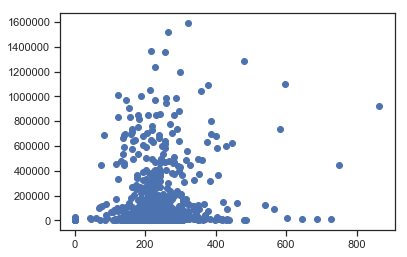

In [137]:
plt.scatter(final2.duration,final2.listeners)